# Lesson 0035 - MNIST Classification Inception Module
In this lesson, we revisit the [MNIST](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb) data set. This time, we will build an Inception module. This means, that we build several parallel pipelines of convolutional neural networks. The idea behind this is, that we employ filters of different sizes in the parallel pipelines, so that in each pipeline different features are selected.<br>
We start by stealing code from [lesson 0018](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0018_mnist_classification_convolutional_neural_network.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [4]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


In [5]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma




train_x = np.reshape( train_x, [ 60000, 28, 28, 1 ] )

test_x = np.reshape( test_x, [ 10000, 28, 28, 1 ] )

In [6]:
train_y_2 = np.zeros( shape = [ 60000, 10 ] )

test_y_2 = np.zeros( shape = [ 10000, 10 ] )




for i in range( 60000 ):
    
    train_y_2[ i, train_y[ i ] ] = 1.0
    
    
for i in range( 10000 ):
    
    test_y_2[ i, test_y[ i ] ] = 1.0
    




train_y = train_y_2

test_y = test_y_2

In [7]:
import keras
from keras import models
from keras import layers

print( keras.__version__ )

2.2.4


Using TensorFlow backend.


Now that we have prepared the data, we can start building the model.<br>
We will create three pipelines, one where the convolutional filters are of size $1*1$, one where the convolutional filters are of size $3*3$, and one where the filters are of size $5*5$. In the pipeline for $1*1$, we will employ $128$ filters, for the pipeline with $3*3$ filters, we will employ $64$ filters, and for the last pipeline, we will employ $32$ filters.<br>
We use [Input](https://keras.io/layers/core/) to build the input tensor. We use [Conv2D](https://keras.io/layers/convolutional/) to build the convolutional layers. We also employ [MaxPooling2D](https://keras.io/layers/pooling/).<br>
Once we have built this architecture, we flatten each pipeline, and then, we [concatenate](https://keras.io/layers/merge/) the flattened pipelines.<br>
We build the final model using [Model](https://keras.io/models/model/).

In [8]:
x = keras.engine.input_layer.Input( shape = ( 28, 28, 1, ) )




pipeline1 = layers.Conv2D( 128, 1, activation = layers.LeakyReLU( alpha = 0.3 ) )( x )

pipeline1 = layers.Conv2D( 128, 1, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline1 )

pipeline1 = layers.MaxPooling2D()( pipeline1 )

pipeline1 = layers.Conv2D( 128, 1, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline1 )

pipeline1 = layers.Conv2D( 128, 1, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline1 )

pipeline1 = layers.MaxPooling2D()( pipeline1 )




pipeline3 = layers.Conv2D( 64, 3, activation = layers.LeakyReLU( alpha = 0.3 ) )( x )

pipeline3 = layers.Conv2D( 64, 3, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline3 )

pipeline3 = layers.MaxPooling2D()( pipeline3 )

pipeline3 = layers.Conv2D( 64, 3, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline3 )

pipeline3 = layers.Conv2D( 64, 3, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline3 )

pipeline3 = layers.MaxPooling2D()( pipeline3 )




pipeline5 = layers.Conv2D( 32, 5, activation = layers.LeakyReLU( alpha = 0.3 ) )( x )

pipeline5 = layers.Conv2D( 32, 5, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline5 )

pipeline5 = layers.MaxPooling2D()( pipeline5 )

pipeline5 = layers.Conv2D( 32, 5, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline5 )

pipeline5 = layers.Conv2D( 32, 5, activation = layers.LeakyReLU( alpha = 0.3 ) )( pipeline5 )

pipeline5 = layers.MaxPooling2D()( pipeline5 )




flat1 = layers.Flatten()( pipeline1 )

flat3 = layers.Flatten()( pipeline3 )

flat5 = layers.Flatten()( pipeline5 )




combined = layers.concatenate( [ flat1, flat3, flat5 ], axis = -1 )




output = layers.Dense( 10, activation = "softmax" )( combined )




model = keras.Model( x, output )




model.compile( optimizer = keras.optimizers.SGD( lr = 0.1, momentum = 0.0, decay = 0.0, nesterov = False ),
               loss = "categorical_crossentropy", metrics = [ "accuracy" ] )

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\rhopi\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [9]:
history = model.fit( train_x, train_y, epochs = 40, batch_size = 100, validation_data = ( test_x, test_y ) )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 19s 312us/step - loss: 0.2068 - acc: 0.9373 - val_loss: 0.0566 - val_acc: 0.9814
Epoch 2/40
60000/60000 [==============================] - 15s 246us/step - loss: 0.0601 - acc: 0.9823 - val_loss: 0.0438 - val_acc: 0.9858
Epoch 3/40
60000/60000 [==============================] - 15s 246us/step - loss: 0.0441 - acc: 0.9865 - val_loss: 0.0436 - val_acc: 0.9861
Epoch 4/40
60000/60000 [==============================] - 15s 246us/step - loss: 0.0354 - acc: 0.9892 - val_loss: 0.0319 - val_acc: 0.9891
Epoch 5/40
60000/60000 [==============================] - 15s 246us/step - loss: 0.0292 - acc: 0.9907 - val_loss: 0.0396 - val_acc: 0.9867
Epoch 6/40
60000/60000 [==============================] - 15s 247us/step - loss: 0.0247 - acc: 0.9924 - val_loss: 0.0295 - val_acc: 0.9897
Epoch 7/40
60000/60000 [==============================] - 15s 247us/

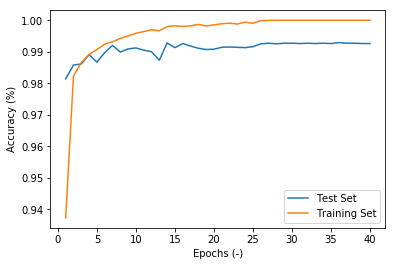

In [10]:
epochs = range( 1, len( history.history[ 'val_acc' ] ) + 1 )

plt.plot( epochs, history.history[ 'val_acc' ], label = "Test Set" )

plt.plot( epochs, history.history[ 'acc' ], label = "Training Set" )

plt.xlabel( "Epochs (-)" )

plt.ylabel( "Accuracy (%)" )

plt.legend()

This model outperforms our [best model](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0023_mnist_classification_convolutional_neural_network_6.ipynb) for the MNIST data set.<br>
This is due to the fact, that we employ several different filters which scan the images for artefacts of different sizes.<br>
Class dismissed.